# Clasificación de Género Clasical Aproach

### Josep Monclús Carrasco

In [54]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("tutors.csv")
dataset = dataset[dataset["descripcion_clean"].notna()]

In [57]:
dataset = dataset[dataset["descripcion_clean"].str.len() > 50]

In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer

In [88]:
genderized_words = {
    "profesor":"profesorx","profesora":"profesorx",
    "professor":"profesorx","professora":"profesorx",
    "maestro":"maestrx","maestra":"maestrx",
    "licenciado":"licenciadx","licenciada":"licenciadx",
    "simpatica":"simpaticx","simpatico":"simpaticx",
    "educada":"educadx","educado":"educadx",
    "graduada":"graduadx","graduado":"graduadx",
    "especializado":"especializadx","especializada":"especializadx",
    "chico":"chicx","chica":"chicx",
    "biólogo":"biologx","bióloga":"biologx",
    "compositor":"compositorx","compositora":"compositorx",
    "director":"directorx","directora":"directorx",
    "tutor":"tutorx","tutora":"tutorx",
    "diplomado":"diplomadx","diplomada":"diplomadx",
    "traductor":"traductorx","traductora":"traductorx",
    "francesa":"francesx","frances":"francesx",
    "examinador":"examinadorx","examinadora":"examinadorx",
    "haberla":"haberlx","haberlo":"haberlx",
    "músico":"musicx","música":"musicx",
    "musico":"musicx","musica":"musicx",
    "chicas":"chicxs","chicos":"chicxs",
    "hija":"hijx","hijo":"hijx",
    "bailarín":"bailarinx","bailarina":"bailarinx","bailarin":"bailarinx",
    "certificado":"certificadx","certificada":"certificadx",
    "recomendarla":"recomendarlx","recomendarlo":"recomendarlx",
    "primera":"primerx","primero":"primerx",
    "tenerla":"tenerlx","tenerle":"tenerlx","tenerlo":"tenerlx",
    "nativa":"nativx","nativo":"nativx",
    "implicada":"implicadx","implicado":"implicadx",
    "ingeniero":"ingenierx","ingeniera":"ingenierx",
    "entrenador":"entrenadorx","entrenadora":"entrenadorx",
    "titulado":"tituladx","titulada":"tituladx",
    "encantado":"encantadx","encantada":"encantadx",
    "apasionado":"apasionadx","apasionada":"apasionadx",
    "dispuesto":"dispuestx","dispuesta":"dispuestx",
    "comprometida":"comprometidx","comprometido":"comprometidx",
    "estupendo":"estupendx","estupenda":"estupendx",
    "preparado":"preparadx","preparada":"preparadx",
    "buen":"buenx","buena":"buenx","bueno":"buenx",
    "cercano":"cercanx","cercana":"cercanx",
    "didáctico":"didáctix","didáctica":"didársctix",
    "profesores":"profesorxs","profesoras":"profesorxs",
    "amigo":"amigx","amiga":"amigx",
    "majo":"majx","maja":"majx",
    "monitor":"monitorx","monitora":"monitorx",
    "dedicada":"dedicadx","dedicado":"dedicadx",
    "recomendado":"recomendadx","recomendada":"recomendadx",
    "atento":"atentx","atenta":"atentx",
    "simpático":"simpaticx","simpática":"simpaticx",
    "motivadora":"motivadorx","motivador":"motivadorx",
    "trabajador":"trabajadorx","trabajadora":"trabajadorx",
    "encantadora":"encantadorx","encantador":"encantadorx",
    "seria":"serix","serio":"serix",
    "chicos":"chicxs","chicas":"chicxs",
    "preparado":"preparadx","preparada":"preparadx",
    "fantástico":"fantásticx","fantástica":"fantásticx",
    "comprometida":"comprometidx","comprometido":"comprometidx",
    "claro":"clarx","clara":"clarx",
    "sencillo":"sencillx","sencilla":"sencillx",
    "divertido":"divertidx","divertida":"divertidx",
    "magnífico":"magníficx","magnífica":"magníficx",
    "compañero":"compañerx","compañera":"compañerx",
    "dinámico":"dinámicx","dinámica":"dinámicx",
    "comprensivo":"comprensivx","comprensiva":"comprensivx",
    "entregado":"entregadx","entregada":"entregadx",
    "cumplidor":"cumplidorx","cumplidora":"cumplidorx",
    "respetuoso":"respetuosx","respetuosa":"respetuosx",
    "digno":"dignx","digna":"dignx",
    "organizada":"organizadx","organizado":"organizadx",
    "cariñosa":"cariñosx","cariñoso":"cariñosx",
    "maravillosa":"maravillosx","maravilloso":"maravillosx",
    "empática":"empáticx","empático":"empáticx",
    "tranquilo":"tranquilx","tranquila":"tranquilx",
    "magnífico":"magníficx","magnífica":"magníficx",
    "metódico":"metódicx","metódica":"metódicx",
    "cualificado":"cualificadx","cualificada":"cualificadx",
    "ordenado":"ordenadx","ordenada":"ordenadx",
    "resolutivo":"resolutivx","resolutiva":"resolutivx",
    "aplicada":"aplicadx","aplicado":"aplicadx",
    "práctico":"prácticx","práctica":"prácticx",
    "motivado":"motivadx","motivada":"motivadx",
    "extraordinario":"extraordinarix","extraordinaria":"extraordinarix",
    "capacitado":"capacitadx","capacitada":"capacitadx",
    "adaptado":"adaptadx","adaptada":"adaptadx",
    "niño":"niñx","niña":"niñx",
    "técnico":"tecnicx","técnica":"tecnicx",
    "abierto":"abiertx","abierta":"abiertx"
}

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
tfidf_vectorizer=TfidfVectorizer(stop_words=stop, max_df=0.7)
#Data cleaning 
dataset["descripcion_clean2"]=dataset["descripcion_clean"].str.lower()
# remove punctuation
dataset['descripcion_clean2'] = dataset['descripcion_clean2'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove one and two character words
dataset['descripcion_clean2'] = dataset['descripcion_clean2'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove numerical values
dataset['descripcion_clean2'] = dataset['descripcion_clean2'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
dataset['descripcion_clean2'] = dataset['descripcion_clean2'].apply(lambda x: re.sub('\s+', ' ', x))
# Neutralizar género
dataset['descripcion_clean2'] = dataset['descripcion_clean2'].apply(lambda x: " ".join([word if word not in genderized_words else genderized_words[word] for word in x.split(" ")]))

In [90]:
print("Número de mujeres: ", np.sum(dataset.genero == "female")) 
print("Número de hombres: ", np.sum(dataset.genero == "male")) 

Número de mujeres:  5048
Número de hombres:  4113


HACER EL SPLIT 80/10/10

In [ ]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score,roc_auc_score
import time
t = time.time()
dataset["genero_int"] = dataset.genero
dataset["genero_int"][dataset["genero_int"] == "female"] = 1
dataset["genero_int"][dataset["genero_int"] == "male"] = 0
x_train,x_test,y_train,y_test=train_test_split(dataset['descripcion_clean2'], dataset.genero_int, test_size=0.2, random_state=7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(time.time() - t)

In [ ]:
t = time.time()
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear',probability=True)
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test,predictions_SVM)*100)
print("SVM AUCroc -> ",roc_auc_score(y_test,predictions_SVM))
print(time.time() - t)

In [52]:
#Pasamos por todo el dataset el tfidf
male_df = dataset[dataset["genero_int"] == 0]
female_df = dataset[dataset["genero_int"] == 1]
tfidf_male = tfidf_vectorizer.transform(male_df["descripcion_clean2"]) 
tfidf_female = tfidf_vectorizer.transform(female_df["descripcion_clean2"]) 
#Predecimos
probabilities_males = SVM.predict_proba(tfidf_male)
probabilities_females = SVM.predict_proba(tfidf_female)
#Sacamos su gender incongruence
male_incongruence = probabilities_males[:,1]
female_incongruence = probabilities_females[:,0]

In [ ]:
#Sacamos el top 10 mujeres con más gender incongruence
ind_femal = sorted(range(len(female_incongruence)), key=lambda i: female_incongruence[i])[-10:]
for i in ind_femal:
    print("*"*30)
    print(female_df["descripcion"].iloc[i])
    print("*"*30)

In [ ]:
#Sacamos el top 10 hombres con más gender incongruence
ind_mal = sorted(range(len(male_incongruence)), key=lambda i: male_incongruence[i])[-10:]
for i in ind_mal:
    print("*"*30)
    print(male_df["descripcion"].iloc[i])
    print("*"*30)

In [28]:
male_incongruence[2797]

0.9770880490957047

In [97]:
t = time.time()
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.02, kernel='linear', degree=3, gamma='auto')#,probability=True)
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test,predictions_SVM)*100)
print("SVM AUCroc -> ",roc_auc_score(y_test,predictions_SVM))
print(time.time() - t)

SVM Accuracy Score ->  77.9596290234588
SVM AUCroc ->  0.7724785110634916
21.256436109542847


In [103]:
coefs = np.sort(SVM.coef_.toarray())
k_words = 20
male_words = coefs[0][0:k_words]
female_words = coefs[0][-k_words:]
pal_male = []
pal_female = []
for i in range(k_words):
    ind_male = SVM.coef_.toarray().tolist()[0].index(male_words[i])
    val_male = male_words[i]
    ind_female = SVM.coef_.toarray().tolist()[0].index(female_words[i])
    val_female = female_words[i]
    for palabra,numero in tfidf_vectorizer.vocabulary_.items():
        if numero == ind_male:
            pal_male.append([palabra,val_male])
        if numero == ind_female:
            pal_female.append([palabra,val_female])

In [104]:
pal_male

[['informática', -2.3709894554499966],
 ['casos', -2.3406054501654805],
 ['problemas', -2.290807868787725],
 ['buscan', -2.189631165593633],
 ['ingeniería', -2.135511869573701],
 ['tipos', -2.1294633943257857],
 ['guitarra', -2.075636512213851],
 ['pantalla', -2.014222921065295],
 ['sistema', -1.9657508207361818],
 ['saludos', -1.9467360023134237],
 ['aprobar', -1.9394378463400355],
 ['física', -1.9042893534114658],
 ['entrenadorx', -1.868778108119337],
 ['serix', -1.867187509598873],
 ['acento', -1.824195212349706],
 ['industrial', -1.7612269043461186],
 ['sistemas', -1.7539369543506134],
 ['permite', -1.7429397967388292],
 ['añadir', -1.7381817958726544],
 ['desplazo', -1.7105569203582245]]

In [105]:
pal_female

[['profe', 1.5195541335273999],
 ['trayectoria', 1.5363194048011322],
 ['técnicas', 1.540835865171854],
 ['actualmente', 1.5452688022161587],
 ['memoria', 1.5478065782786041],
 ['violín', 1.5666761948352304],
 ['cantar', 1.620653329662999],
 ['placer', 1.634063002543961],
 ['inmersión', 1.6354182260551937],
 ['adapto', 1.637936256777779],
 ['amor', 1.7012216318405122],
 ['danza', 1.7087187771341203],
 ['libre', 1.710371174176926],
 ['esquemas', 1.757102868650598],
 ['vocal', 2.003922150982235],
 ['seguir', 2.0430067341607256],
 ['creatividad', 2.277795295489555],
 ['pasos', 2.313447952370609],
 ['depende', 2.3734890847624093],
 ['niños', 2.747462574294562]]

In [98]:
print("Palabras más usadas por hombres")
for palabra,numero in tfidf_vectorizer.vocabulary_.items():
    if numero in ind_male:
        print(palabra,val_male[ind_male.index(numero)])

Palabras más usadas por hombres
sistemas -1.7539369543506134
ingeniería -2.135511869573701
física -1.9042893534114658
problemas -2.290807868787725
aprobar -1.9394378463400355
permite -1.7429397967388292
desplazo -1.7105569203582245
buscan -2.189631165593633
entrenadorx -1.868778108119337
añadir -1.7381817958726544
guitarra -2.075636512213851
acento -1.824195212349706
tipos -2.1294633943257857
informática -2.3709894554499966
sistema -1.9657508207361818
industrial -1.7612269043461186
casos -2.3406054501654805
pantalla -2.014222921065295
serix -1.867187509598873
saludos -1.9467360023134237


In [102]:
print("Palabras más usadas por mujeres")
for palabra,numero in tfidf_vectorizer.vocabulary_.items():
    if numero in ind_female:
        print(palabra,val_female[ind_female.index(numero)])

Palabras más usadas por mujeres
técnicas 1.540835865171854
niños 2.747462574294562
libre 1.710371174176926
amor 1.7012216318405122
actualmente 1.5452688022161587
danza 1.7087187771341203
creatividad 2.277795295489555
adapto 1.637936256777779
trayectoria 1.5363194048011322
esquemas 1.757102868650598
seguir 2.0430067341607256
depende 2.3734890847624093
vocal 2.003922150982235
cantar 1.620653329662999
pasos 2.313447952370609
profe 1.5195541335273999
memoria 1.5478065782786041
placer 1.634063002543961
inmersión 1.6354182260551937
violín 1.5666761948352304


In [39]:
SVM.n_features_in_

25581

In [ ]:
## Shifterator Descripciones

In [23]:
#!pip install shifterator

In [24]:
stop = stopwords.words('spanish')
stop.extend(["profesor", "profesora", "maestro"
             , "maestra", "licenciada", "licenciado"
             , "simpatica", "simpatico", "educado"
             , "educada", "graduada", "graduado"
             , "nativa", "nativo","implicada","implicado","ingeniero"
             ,"ingeniera","entrenador","entrenadora"
             ,"titulada","titulado","especializado","especializada"
             ,"encantado","encantada","apasionado","apasionada"
             ,"chico","chica","dispuesto","dispuesta","biólogo","bióloga"
             ,"compositor","compositora","director","directora","músico",
            "tutor","tutora","diplomada","diplomado","traductora","traductor",
            "francesa","examinador","examinadora","comprometida","comprometido"])

In [26]:
def text_preprocessing_updated(text_data,language="es"):
    preprocessed_texts = []
    for text in text_data:
            #text = text.lower()
            # hashtags -> words, URLs -> URL and mentions -> USER
            text=text.lower()
            # remove punctuation
            text =re.sub('[^\w\s]', ' ', text)
            # remove one and two character words
            text = re.sub(r'\b\w{1,3}\b', '', text)
            # remove numerical values
            text = re.sub(r'[0-9]+', '', text)
            # \s+ means all empty space (\n, \r, \t)
            text = re.sub('\s+', ' ', text)
            # Neutralizar género
            text = " ".join([word if word not in genderized_words else genderized_words[word] for word in text.split(" ")])
            text = re.sub('#', '', text)
            text = re.sub('\n', ' ', text)
            text = re.sub('((www\.[\\s]+)|(https?://[^\\s]+))', 'URL', text)
            text = re.sub('\_', ' ', text) # _
            text = re.sub('\!', ' ', text) # !
            text = re.sub('\?', ' ', text) # ?
            text = re.sub('\W', ' ', text) # symbols
            text = re.sub('\_', ' ', text) # _
            text = re.sub('[\s]+', ' ', text) # spaces
            text = re.sub(r'(\d)\s+(\d)', r'\1\2', text) # remove spaces between numbers
            text = text.replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
            text = text.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
            text_a = [word for word in text.split(" ") if word not in stop]
            text = " ".join(text_a)

            preprocessed_texts.append(text.lower())

    return preprocessed_texts

In [28]:
#Materia escogida
materia = "Ciencias"
dataset_m = dataset_m[dataset_m["materia"]==materia]
df_male = dataset["comentarios"][dataset["genero"]=="male"]
male_preprop = text_preprocessing_updated(df_male)
df_female = dataset_m["comentarios"][dataset_m["genero"]=="female"]
female_preprop = text_preprocessing_updated(df_female)

In [34]:
#male_preprop
import shifterator as sh
from nltk.tokenize import word_tokenize
text_m = " ".join(male_preprop).replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
text_m = text_m.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
text_m = text_m.split()
tokens = [word_tokenize(text_m[i]) for i in range(len(text_m))]
flat_list_tokens_m = [item for sublist in tokens for item in sublist]

text_f = " ".join(female_preprop).replace("í","i").replace("á","a").replace("ó","o").replace("ú","u").replace("é","e")
text_f = text_f.replace("0","").replace("1","").replace("2","").replace("3","").replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","")
text_f = text_f.split()
tokens = [word_tokenize(text_f[i]) for i in range(len(text_f))]
flat_list_tokens_f = [item for sublist in tokens for item in sublist]


In [35]:
from collections import Counter
mst_male = Counter(flat_list_tokens_m).most_common(2000)
mst_female = Counter(flat_list_tokens_f).most_common(2000)


In [36]:
freq_male = dict()
for word in mst_male:
    freq_male[word[0]] = word[1]
    
freq_female = dict()
for word in mst_female:
    freq_female[word[0]] = word[1]

/Users/josepmoncluscarrasco/opt/anaconda3/lib/python3.7/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


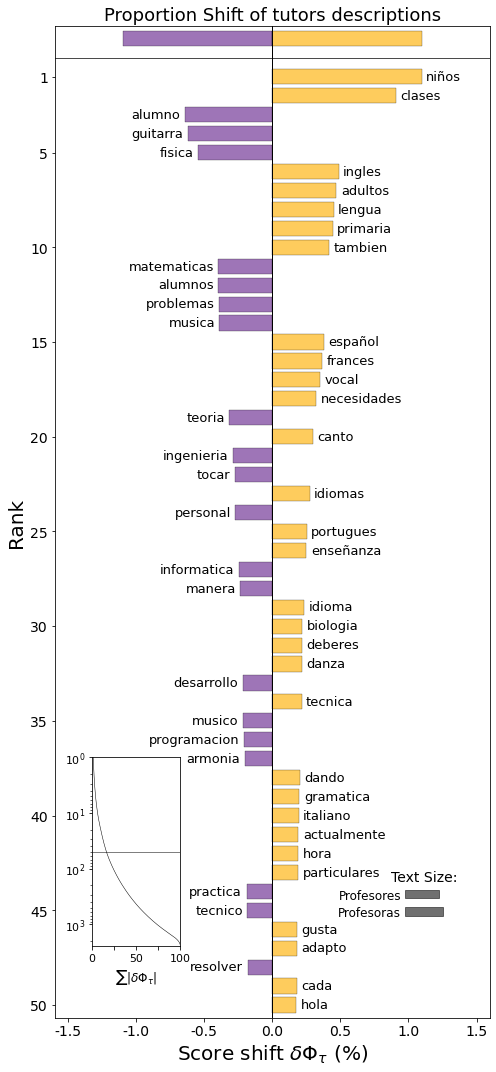

<AxesSubplot:title={'center':'Proportion Shift of tutors descriptions'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [37]:
proportion_shift = sh.ProportionShift(type2freq_1=freq_male,
                                      type2freq_2=freq_female)
proportion_shift.get_shift_graph(system_names = ['Profesores', 'Profesoras'],
                                 title='Proportion Shift of tutors descriptions')